In [23]:
"""Run this cell if in new enviroment without slam installed"""
# ! pip install git+https://github.com/Pitt-JonesLab/slam_decomposition
# #write to config file an empty directory (monkey patching for sake of portability)
# f = open("config.py", "w")
# f.write('srcpath = "content/"')
# f.close()

'Run this cell if in new enviroment without slam installed'

#### Objective construct basic examples of pd gates trajectories in order to understand the geometry

In [24]:
%matplotlib widget
from slam.utils.pd_playground import ParallelDrivenGateWidget
import numpy as np
from slam.utils.visualize import coordinate_2dlist_weyl
from ipywidgets import interact

In [25]:
pdgw = ParallelDrivenGateWidget(N = 15, gc = np.pi/2, gg = 0, phase_a=np.pi/4, phase_b=np.pi/3,phase_c = 0, phase_g = np.pi/2)

In [26]:
# # use widget to change parameters
# bounds = (-2*np.pi, 2*np.pi)
# interact(pdgw.widget_wrap, q0=bounds, q1=bounds);

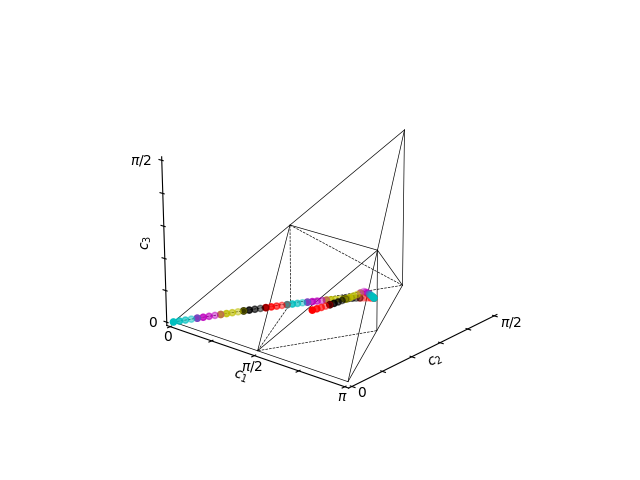

In [27]:
# # use widget to change parameters
bounds = (-2*np.pi, 2*np.pi)
gx = list(np.ones(5)*2*np.pi) + list(np.ones(5)*0)# + list(np.ones(5)*0*np.pi/2) 
#gy = list(np.ones(10)*0*np.pi)# + list(np.ones(5)*0*np.pi/2) 
gx = [0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi]
# gx = np.zeros(15)
gy =  [0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi,0.33*np.pi]
gy = np.zeros(15)
pdgw.prepare_parameters_nonuniform(gx,gy)
pdgw.iterate_time()
coordinate_2dlist_weyl(*pdgw.coordinate_list);

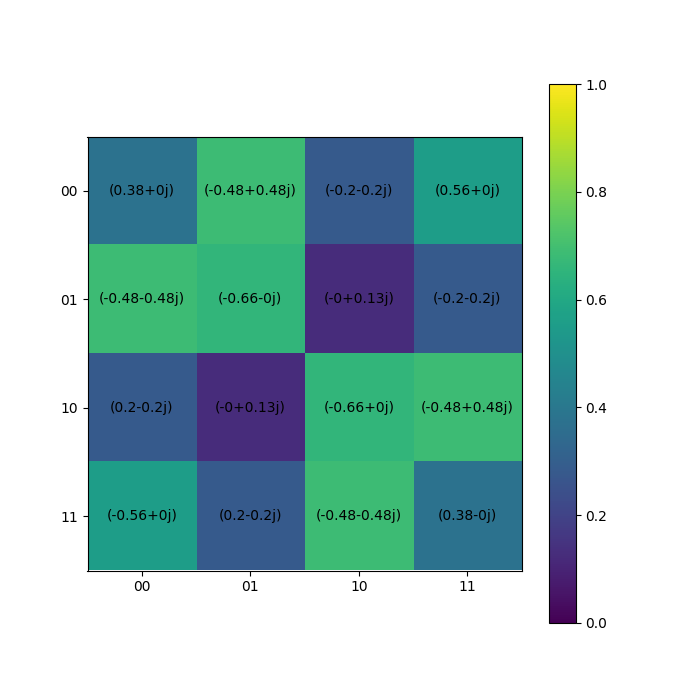

In [28]:
from slam.utils.visualize import plotMatrix
plotMatrix(pdgw.final_unitary);

In [5]:
pdgw = ParallelDrivenGateWidget(N=15, gc = 3*np.pi/4, gg = 0, phase_c = 0, phase_g = 0)

In [4]:
#optimize parameter vectors to go to SWAP gate
from qiskit.circuit.library import SwapGate
from weylchamber import c1c2c3
target = c1c2c3(SwapGate().to_matrix())

In [4]:
# from scipy.optimize import minimize
# from tqdm import tqdm
# # define cost function as the distance between the target and each of the end segement points
# gx, gy = np.zeros(15), np.zeros(15)

# for n_iter in tqdm(range(1, 10)):
#     pdgw = ParallelDrivenGateWidget(N=15, gc = 3*np.pi/4, gg = 0, phase_c = 0, phase_g = 0)
#     rand_index = np.random.randint(0, 15)
#     def cost_function(p):
#         pdgw.prepare_parameters_nonuniform(list(gx[:rand_index])+[p[0]]+list(gx[1+rand_index:]), list(gy[:rand_index])+[p[1]]+list(gy[1+rand_index:]))
#         pdgw.iterate_time()
#         # print(pdgw.end_segment_list)
#         return np.linalg.norm(np.array(target) - np.array(pdgw.end_segment_list)[-1])

#     # optimize
#     res = minimize(cost_function, [0,0], method='Nelder-Mead', options={'disp': True})
#     gx[rand_index] = res.x[0]
#     gy[rand_index] = res.x[1]

In [ ]:
# #want to check for changing phase, can the final unitary ever be off bottom plane
# # twirl phase variables 1000 iterations
# #NOTE seems impossible
# from tqdm import tqdm
# for _ in tqdm(range(1000)):
#     phase_a, phase_b, phase_c, phase_g = list(np.random.rand(4) * 2*np.pi)
#     pdgw = ParallelDrivenGateWidget(N = 15, gc = np.pi/2, gg = 0, phase_a=phase_a, phase_b=phase_b, phase_c=phase_c, phase_g=phase_g)
#     gy =  (np.random.rand(15)*4*np.pi)-2*np.pi
#     gy = np.zeros(15)
#     pdgw.prepare_parameters_nonuniform(gx,gy)
#     pdgw.iterate_time()
#     #last segmenet, last point, z coordinate
#     if pdgw.coordinate_list[-1][-1][2]>0:
#         print("off bottom plane")
#         print(phase_a, phase_b, phase_c, phase_g)